In [1]:
#improt libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
import matplotlib as mpl
import pylab
%matplotlib inline
sns.set(style="whitegrid", color_codes=True)
np.random.seed(sum(map(ord, "palettes")))
cmap = sns.diverging_palette(220, 10, as_cmap=True)

In [2]:
#upload dataset
diab=pd.read_csv('D:\Documents\Study\SMU\Term3\DataMining\Project\Data\diabetic_data.csv')
diab.head(n=10)

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
5,35754,82637451,Caucasian,Male,[50-60),?,2,1,2,3,...,No,Steady,No,No,No,No,No,No,Yes,>30
6,55842,84259809,Caucasian,Male,[60-70),?,3,1,2,4,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
7,63768,114882984,Caucasian,Male,[70-80),?,1,1,7,5,...,No,No,No,No,No,No,No,No,Yes,>30
8,12522,48330783,Caucasian,Female,[80-90),?,2,1,4,13,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
9,15738,63555939,Caucasian,Female,[90-100),?,3,3,4,12,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [3]:
print (diab.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
encounter_id                101766 non-null int64
patient_nbr                 101766 non-null int64
race                        101766 non-null object
gender                      101766 non-null object
age                         101766 non-null object
weight                      101766 non-null object
admission_type_id           101766 non-null int64
discharge_disposition_id    101766 non-null int64
admission_source_id         101766 non-null int64
time_in_hospital            101766 non-null int64
payer_code                  101766 non-null object
medical_specialty           101766 non-null object
num_lab_procedures          101766 non-null int64
num_procedures              101766 non-null int64
num_medications             101766 non-null int64
number_outpatient           101766 non-null int64
number_emergency            101766 non-null int64
number_inpatient            10176

In [4]:
# Replace missing values to NaN
diab = diab.replace(to_replace='?',value=np.nan)

In [5]:
#describe object variables
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
diab.describe(include=["O"])

,race,gender,age,weight,payer_code,medical_specialty,diag_1,diag_2,diag_3,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
count,99493,101766,101766,3197,61510,51817,101745,101408,100343,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766
unique,5,3,10,9,17,72,716,748,789,4,4,4,4,4,4,4,2,4,4,2,4,4,4,4,2,3,1,1,4,4,2,2,2,2,2,2,3
top,Caucasian,Female,[70-80),[75-100),MC,InternalMedicine,428,276,250,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO
freq,76099,54708,26068,1336,32439,14635,6862,6752,11555,96420,84748,81778,100227,101063,101680,96575,101765,89080,91116,101743,94438,95401,101458,101728,101763,101727,101766,101766,47383,101060,101753,101765,101764,101765,54755,78363,54864


In [6]:
#make some features categorical
diab['medical_specialty'] = diab['medical_specialty'].astype('category')
diab['payer_code'] = diab['payer_code'].astype('category')
diab['encounter_id'] = diab['encounter_id'].astype('category')
diab['patient_nbr'] = diab['patient_nbr'].astype('category')
diab['admission_type_id'] = diab['admission_type_id'].astype('category')
diab['discharge_disposition_id'] = diab['discharge_disposition_id'].astype('category')
diab['admission_source_id'] = diab['admission_source_id'].astype('category')
diab['race'] = diab['race'].astype('category')
diab["A1Cresult"] = diab["A1Cresult"].astype('category',ordered=True)
diab["age"] = diab["age"].astype('category',ordered=True)
diab['max_glu_serum'] = diab['max_glu_serum'].astype('category',ordered=True)
diab['gender'] = diab['gender'].astype('category')
diab['diabetesMed'] = diab['diabetesMed'].astype('category')
diab['change'] = diab['change'].astype('category')
diab['insulin'] = diab['insulin'].astype('category')
diab['metformin-pioglitazone'] = diab['metformin-pioglitazone'].astype('category')
diab['metformin-rosiglitazone'] = diab['metformin-rosiglitazone'].astype('category')
diab['glimepiride-pioglitazone'] = diab['glimepiride-pioglitazone'].astype('category')
diab['glipizide-metformin'] = diab['glipizide-metformin'].astype('category')
diab['glyburide-metformin'] = diab['glyburide-metformin'].astype('category')
diab['citoglipton'] = diab['citoglipton'].astype('category')
diab['examide'] = diab['examide'].astype('category')
diab['tolazamide'] = diab['tolazamide'].astype('category')
diab['troglitazone'] = diab['troglitazone'].astype('category')
diab['rosiglitazone'] = diab['rosiglitazone'].astype('category')
diab['miglitol'] = diab['miglitol'].astype('category')
diab['acarbose'] = diab['acarbose'].astype('category')
diab['pioglitazone'] = diab['pioglitazone'].astype('category')
diab['tolbutamide'] = diab['tolbutamide'].astype('category')
diab['glyburide'] = diab['glyburide'].astype('category')
diab['glipizide'] = diab['glipizide'].astype('category')
diab['acetohexamide'] = diab['acetohexamide'].astype('category')
diab['glimepiride'] = diab['glimepiride'].astype('category')
diab['chlorpropamide'] = diab['chlorpropamide'].astype('category')
diab['nateglinide'] = diab['nateglinide'].astype('category')
diab['repaglinide'] = diab['repaglinide'].astype('category')
diab['metformin'] = diab['metformin'].astype('category')

In [7]:
#see levels of some categorical variables
diab["max_glu_serum"].value_counts()

None    96420
Norm     2597
>200     1485
>300     1264
Name: max_glu_serum, dtype: int64

In [8]:
diab["metformin"].value_counts()

No        81778
Steady    18346
Up         1067
Down        575
Name: metformin, dtype: int64

In [9]:
diab["acetohexamide"].value_counts()
#only 1 patient had this medication

No        101765
Steady         1
Name: acetohexamide, dtype: int64

In [10]:
#some rare medications (<50 patients used it)
#acetohexamide - 1
#miglitol - 38
#tolbutamide - 23
#troglitazone - 3
#tolazamide - 39
#glipizide-metformin - 13
#glimepiride-pioglitazone - 1
#metformin-rosiglitazone - 2
#metformin-pioglitazone - 1

In [11]:
#examide and citoglipton medications nobody used. Can drop variables
diab.drop(["examide"],axis=1, inplace = True)
diab.drop(["citoglipton"],axis=1, inplace = True)

In [12]:
#describe numeric variables
diab.describe(include=[np.number])

,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses
count,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000
mean,4.395987,43.095641,1.339730,16.021844,0.369357,0.197836,0.635566,7.422607
std,2.985108,19.674362,1.705807,8.127566,1.267265,0.930472,1.262863,1.933600
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,31.000000,0.000000,10.000000,0.000000,0.000000,0.000000,6.000000
50%,4.000000,44.000000,1.000000,15.000000,0.000000,0.000000,0.000000,8.000000
75%,6.000000,57.000000,2.000000,20.000000,0.000000,0.000000,1.000000,9.000000
max,14.000000,132.000000,6.000000,81.000000,42.000000,76.000000,21.000000,16.000000


In [13]:
#Percent of missing values in dataset
missVal=round(diab.isnull().sum()*100/len(diab),2)
missVal.iloc[missVal.nonzero()]
#payer_code and medical_specialty contain a lot of missing values. We believe they aren't relevant to outcome.
#but measurement of weight can be indicator of the hospital overall quality.

race                  2.23
weight               96.86
payer_code           39.56
medical_specialty    49.08
diag_1                0.02
diag_2                0.35
diag_3                1.40
dtype: float64

In [14]:
#Checking for duplicates by encounter_id
checkCol = diab["encounter_id"]
diab[checkCol.isin(checkCol[checkCol.duplicated()])]

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted


In [15]:
#categories of featrues. No need to change anything in data frame
continuous_features = ['time_in_hospital','num_lab_procedures','num_procedures','num_medications'
                       ,'number_outpatient','number_emergency','number_inpatient','number_diagnoses','weight']
id_features = ['encounter_id','patient_nbr','admission_type_id','discharge_disposition_id','admission_source_id']
ordinal_features=['age','A1Cresult','max_glu_serum']
nominal_features = ['race','gender','payer_code','medical_specialty','diag_1','diag_2','diag_3'
                  ,'metformin','repaglinide','nateglinide','chlorpropamide'
                  ,'glimepiride','acetohexamide','glipizide','glyburide','tolbutamide','pioglitazone'
                  ,'rosiglitazone','acarbose','miglitol','troglitazone','tolazamide','examide','citoglipton'
                  ,'insulin','glyburide-metformin','glipizide-metformin','glimepiride-pioglitazone'
                  ,'metformin-rosiglitazone','metformin-pioglitazone','change','diabetesMed','readmitted']

In [16]:
#make readmittance a dichotomous variable. If the person was readmitted after 30 days, consider not readmitted
diab['readmitted'][diab['readmitted']==">30"]="NO"
#then make readmittance binary variable
diab['readmitted'][diab['readmitted']=="NO"]=0
diab['readmitted'][diab['readmitted']=="<30"]=1
diab['readmitted']=diab['readmitted'].astype('int64')

C:\Program Files\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
C:\Program Files\Anaconda3\lib\site-packages\ipykernel\__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Program Files\Anaconda3\lib\site-packages\ipykernel\__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [17]:
#we want to bin diagnosises according to type.For this reason we need to make them of type int.
diag_num=["diag_1","diag_2","diag_3"]
#replace diagnosis containing E and V as -1 and -2
diab[diag_num] = diab[diag_num].replace({'E':'-1'}, regex=True)
diab[diag_num] = diab[diag_num].replace({'V':'-2'}, regex=True)

diab[diag_num] = diab[diag_num].astype(np.float)

In [18]:
#bin by diagnosis type
pd.options.mode.chained_assignment = None #supress warnings
#diagnosis 1
diab['diag_1_cat']=np.nan #empty column
diab['diag_1_cat'][(diab['diag_1']>=-2000)&(diab['diag_1']<1)] ="Other"
diab['diag_1_cat'][(diab['diag_1']>=280)&(diab['diag_1']<=389)] ="Other"
diab['diag_1_cat'][(diab['diag_1']>=630)&(diab['diag_1']<=679)] ="Other"
diab['diag_1_cat'][(diab['diag_1']>=740)&(diab['diag_1']<=759)] ="Other"
diab['diag_1_cat'][(diab['diag_1']>=1)&(diab['diag_1']<250)] ="Neoplasms"
diab['diag_1_cat'][(diab['diag_1']>=251)&(diab['diag_1']<280)] ="Neoplasms"
diab['diag_1_cat'][(diab['diag_1']>=790)&(diab['diag_1']<=799)|((diab['diag_1']==780))|((diab['diag_1']==781))
                  |((diab['diag_1']==784))] ="Neoplasms"
diab['diag_1_cat'][(diab['diag_1']>=680)&(diab['diag_1']<=709)|((diab['diag_1']==782))]="Neoplasms"
diab['diag_1_cat'][(diab['diag_1']>=250)&(diab['diag_1']<251)] ="Diabeties"
diab['diag_1_cat'][(diab['diag_1']>=390)&(diab['diag_1']<=459)|((diab['diag_1']==785))] ="Circulatory"
diab['diag_1_cat'][(diab['diag_1']>=460)&(diab['diag_1']<=519)|((diab['diag_1']==786))] ="Respiratory"
diab['diag_1_cat'][(diab['diag_1']>=520)&(diab['diag_1']<=579)|((diab['diag_1']==787))] ="Digestive"
diab['diag_1_cat'][(diab['diag_1']>=800)&(diab['diag_1']<=999)] ="Injury"
diab['diag_1_cat'][(diab['diag_1']>=710)&(diab['diag_1']<=739)] ="Musculoskeletal"
diab['diag_1_cat'][(diab['diag_1']>=580)&(diab['diag_1']<=629)|((diab['diag_1']==788))] ="Genitourinary"
diab['diag_1_cat'][diab['diag_1'].isnull()] ="No diagnosis"
#diagnosis 2
diab['diag_2_cat']=np.nan #empty column
diab['diag_2_cat'][(diab['diag_2']>=-2000)&(diab['diag_2']<1)] ="Other"
diab['diag_2_cat'][(diab['diag_2']>=280)&(diab['diag_2']<=389)] ="Other"
diab['diag_2_cat'][(diab['diag_2']>=630)&(diab['diag_2']<=679)] ="Other"
diab['diag_2_cat'][(diab['diag_2']>=740)&(diab['diag_2']<=759)] ="Other"
diab['diag_2_cat'][(diab['diag_2']>=1)&(diab['diag_2']<250)] ="Neoplasms"
diab['diag_2_cat'][(diab['diag_2']>=251)&(diab['diag_2']<280)] ="Neoplasms"
diab['diag_2_cat'][(diab['diag_2']>=790)&(diab['diag_2']<=799)|((diab['diag_2']==780))|((diab['diag_2']==781))
                  |((diab['diag_2']==784))] ="Neoplasms"
diab['diag_2_cat'][(diab['diag_2']>=680)&(diab['diag_2']<=709)|((diab['diag_2']==782))]="Neoplasms"
diab['diag_2_cat'][(diab['diag_2']>=250)&(diab['diag_2']<251)] ="Diabeties"
diab['diag_2_cat'][(diab['diag_2']>=390)&(diab['diag_2']<=459)|((diab['diag_2']==785))] ="Circulatory"
diab['diag_2_cat'][(diab['diag_2']>=460)&(diab['diag_2']<=519)|((diab['diag_2']==786))] ="Respiratory"
diab['diag_2_cat'][(diab['diag_2']>=520)&(diab['diag_2']<=579)|((diab['diag_2']==787))] ="Digestive"
diab['diag_2_cat'][(diab['diag_2']>=800)&(diab['diag_2']<=999)] ="Injury"
diab['diag_2_cat'][(diab['diag_2']>=710)&(diab['diag_2']<=739)] ="Musculoskeletal"
diab['diag_2_cat'][(diab['diag_2']>=580)&(diab['diag_2']<=629)|((diab['diag_2']==788))] ="Genitourinary"
diab['diag_2_cat'][diab['diag_2'].isnull()] ="No diagnosis"
#diagnosis 3
diab['diag_3_cat']=np.nan #empty column
diab['diag_3_cat'][(diab['diag_3']>=-2000)&(diab['diag_3']<1)] ="Other"
diab['diag_3_cat'][(diab['diag_3']>=280)&(diab['diag_3']<=389)] ="Other"
diab['diag_3_cat'][(diab['diag_3']>=630)&(diab['diag_3']<=679)] ="Other"
diab['diag_3_cat'][(diab['diag_3']>=740)&(diab['diag_3']<=759)] ="Other"
diab['diag_3_cat'][(diab['diag_3']>=1)&(diab['diag_3']<250)] ="Neoplasms"
diab['diag_3_cat'][(diab['diag_3']>=251)&(diab['diag_3']<280)] ="Neoplasms"
diab['diag_3_cat'][(diab['diag_3']>=790)&(diab['diag_3']<=799)|((diab['diag_3']==780))|((diab['diag_3']==781))
                  |((diab['diag_3']==784))] ="Neoplasms"
diab['diag_3_cat'][(diab['diag_3']>=680)&(diab['diag_3']<=709)|((diab['diag_3']==782))]="Neoplasms"
diab['diag_3_cat'][(diab['diag_3']>=250)&(diab['diag_3']<251)] ="Diabeties"
diab['diag_3_cat'][(diab['diag_3']>=390)&(diab['diag_3']<=459)|((diab['diag_3']==785))] ="Circulatory"
diab['diag_3_cat'][(diab['diag_3']>=460)&(diab['diag_3']<=519)|((diab['diag_3']==786))] ="Respiratory"
diab['diag_3_cat'][(diab['diag_3']>=520)&(diab['diag_3']<=579)|((diab['diag_3']==787))] ="Digestive"
diab['diag_3_cat'][(diab['diag_3']>=800)&(diab['diag_3']<=999)] ="Injury"
diab['diag_3_cat'][(diab['diag_3']>=710)&(diab['diag_3']<=739)] ="Musculoskeletal"
diab['diag_3_cat'][(diab['diag_3']>=580)&(diab['diag_3']<=629)|((diab['diag_3']==788))] ="Genitourinary"
diab['diag_3_cat'][diab['diag_3'].isnull()] ="No diagnosis"


In [19]:
#returning diag_1, diag_2, diag_3 to the previous state.
diag_num=["diag_1","diag_2","diag_3"]
#correct type
diab[diag_num] = diab[diag_num].astype("str")
#replace diagnosis containing E and V as -1 and -2
diab[diag_num] = diab[diag_num].replace({'-2':'V'}, regex=True)
diab[diag_num] = diab[diag_num].replace({'-1':'E'}, regex=True)

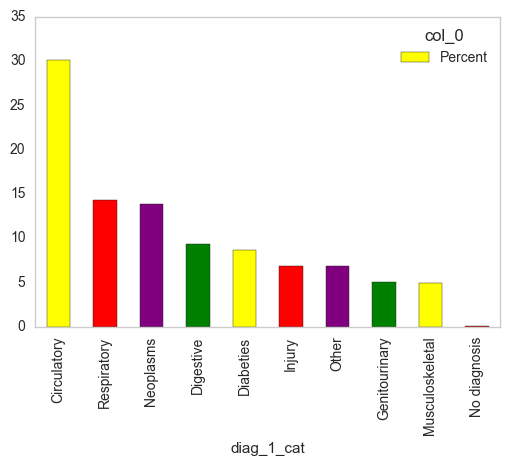

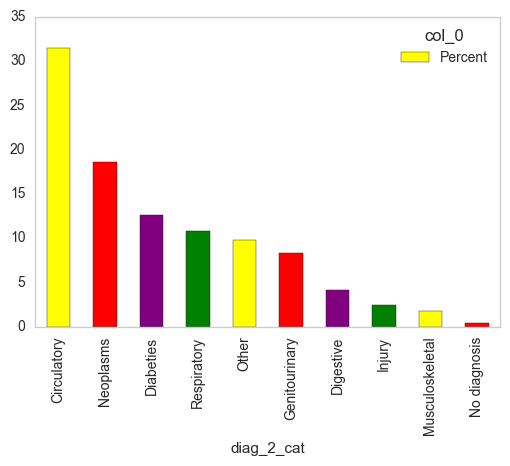

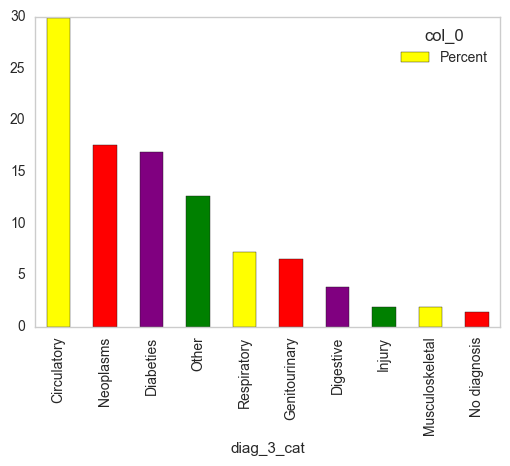

In [20]:
#diagnosis 1 visualization
diag1_counts = pd.crosstab(index = diab["diag_1_cat"], columns="Percent").apply(lambda r: r/r.sum()*100, axis=0
                                                                               ).sort_values(by='Percent',ascending=False)
diag1_counts.plot(kind='bar', stacked=True, color=['yellow','red','purple','green'], grid=False)
#diagnosis 2 visualization
diag2_counts = pd.crosstab(index = diab["diag_2_cat"], columns="Percent").apply(lambda r: r/r.sum()*100, axis=0
                                                                               ).sort_values(by='Percent',ascending=False)
diag2_counts.plot(kind='bar', stacked=True, color=['yellow','red','purple','green'], grid=False)
#diagnosis 3 visualization
diag3_counts = pd.crosstab(index = diab["diag_3_cat"], columns="Percent").apply(lambda r: r/r.sum()*100, axis=0
                                                                               ).sort_values(by='Percent',ascending=False)
diag3_counts.plot(kind='bar', stacked=True, color=['yellow','red','purple','green'], grid=False)

Percentage of weight_status


col_0,Percent
weight_status,
Measured,3.14
Not measured,96.86


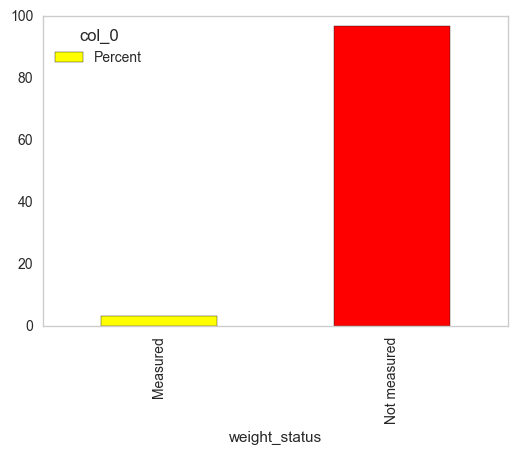

In [21]:
#weigth is coded as meausrement taken or not
diab['weight_status']=np.nan #empty column
diab['weight_status'][diab['weight'].isnull()] ="Not measured"
diab['weight_status'][diab['weight'].notnull()] ="Measured"
weigth_status_percentage = pd.crosstab(index = diab['weight_status'], columns="Percent").apply(lambda r: r/r.sum()*100, axis=0)
weigth_status_percentage.plot(kind='bar', stacked=True, color=['yellow','red','purple','green'], grid=False)
print("Percentage of weight_status")
round(weigth_status_percentage,2)

readmitted                   0      1
A1Cresult weight_status              
False     False          88.57  11.43
          True           88.67  11.33
True      False          90.15   9.85
          True           90.17   9.83

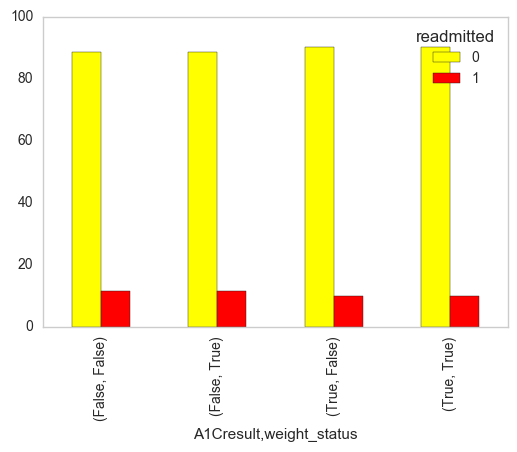

In [22]:
#plot weight_status where A1Cresult was measured
#Left plot weight not measured. Right plot weight measured")
weigth_status_percents = pd.crosstab([diab['A1Cresult']!="None",diab['weight_status']!="Not measured"], 
                              diab.readmitted).apply(lambda r: r/r.sum()*100, axis=1)
weigth_status_percents.plot(kind='bar', stacked=False, color=['yellow','red','purple'], grid=False)
round(weigth_status_percents,2)
#true, true - measured A1C and weight
#false,false - not measured A1C and weight

col_0,Percent
A1Cresult,
>7,3.745848
>8,8.073423
None,83.277322
Norm,4.903406


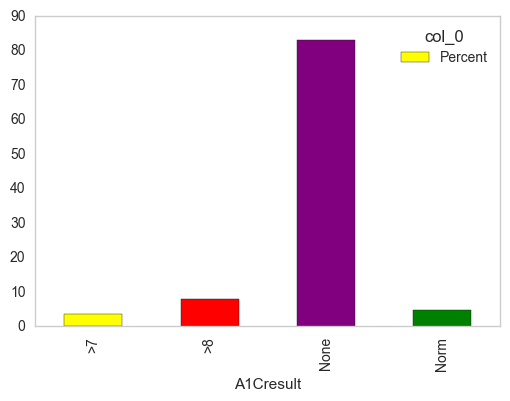

In [23]:
#distribution of A1Cresult
A1Cresult_percentage = pd.crosstab(index = diab["A1Cresult"], columns="Percent").apply(lambda r: r/r.sum()*100, axis=0)

A1Cresult_percentage.plot(kind='bar', stacked=True, color=['yellow','red','purple','green'], grid=False)
A1Cresult_percentage

readmitted            0      1
A1Cresult change              
>7        Ch      89.61  10.39
          No      90.30   9.70
>8        Ch      89.76  10.24
          No      90.83   9.17
None      Ch      87.77  12.23
          No      89.22  10.78
Norm      Ch      90.03   9.97
          No      90.59   9.41

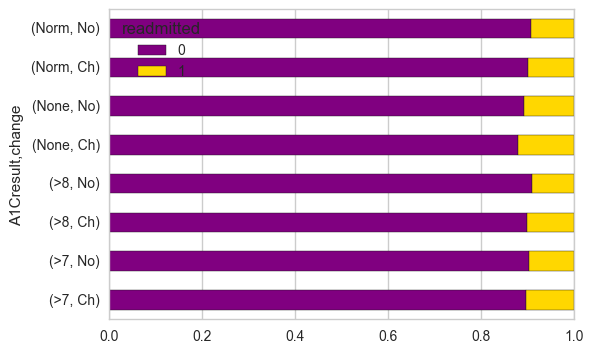

In [24]:
#count readmitted accordint to A1Cresult
A1Cresult_counts = pd.crosstab([diab['A1Cresult'],diab['change']], 
                              diab.readmitted)

# divide the counts to get rates
A1Cresult_rate = A1Cresult_counts.div(A1Cresult_counts.sum(1).astype(float),axis=0)
A1Cresult_rate.plot(kind='barh', 
                   stacked=True,color=['purple','gold'])
#percentage readmitted
round(A1Cresult_rate*100,2)

readmitted,0,1
diag_1_cat,,
Circulatory,88.55,11.45
Diabeties,87.02,12.98
Digestive,89.29,10.71
Genitourinary,89.15,10.85
Injury,87.75,12.25
Musculoskeletal,90.50,9.50
Neoplasms,89.31,10.69
No diagnosis,76.19,23.81
Other,87.63,12.37


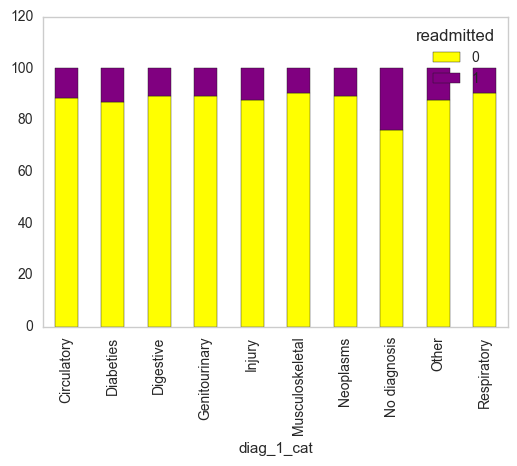

In [25]:
#if the primary diagnosis influence on readmittance
#count readmitted accordint to diag_1_cat
diag1_percentage = pd.crosstab(diab['diag_1_cat'], 
                              diab.readmitted).apply(lambda r: r/r.sum()*100, axis=1)
diag1_percentage.plot(kind='bar', stacked=True, color=['yellow','purple'], grid=False)
round(diag1_percentage,2)



readmitted                             0          1
diag_1_cat diabetesMed change                      
False      No          Ch            NaN        NaN
                       No      90.714415   9.285585
           Yes         Ch      88.304261  11.695739
                       No      88.738474  11.261526
True       No          Ch            NaN        NaN
                       No      85.171103  14.828897
           Yes         Ch      87.121062  12.878938
                       No      87.807933  12.192067

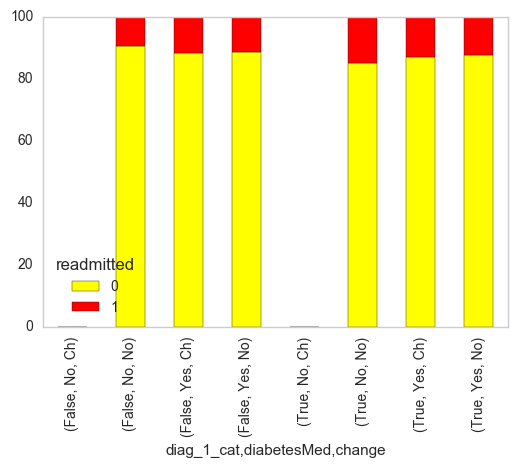

In [26]:
#will try to catch newly diagnosed diabetis. Newly diagnosed shall have primary diagnosis "diabeties", shall have prescribed 
#diabetis medication and shouldn't have change in therapY (because not therapy was before)
diabPrescr_percents = pd.crosstab([diab['diag_1_cat']=="Diabeties",diab["diabetesMed"],diab["change"]],
                           diab.readmitted).apply(lambda r: r/r.sum()*100, axis=1)
diabPrescr_percents.plot(kind='bar', stacked=True, color=['yellow','red','purple'], grid=False) 
diabPrescr_percents
#apparently this combination isn't strongest predictor of readmittance

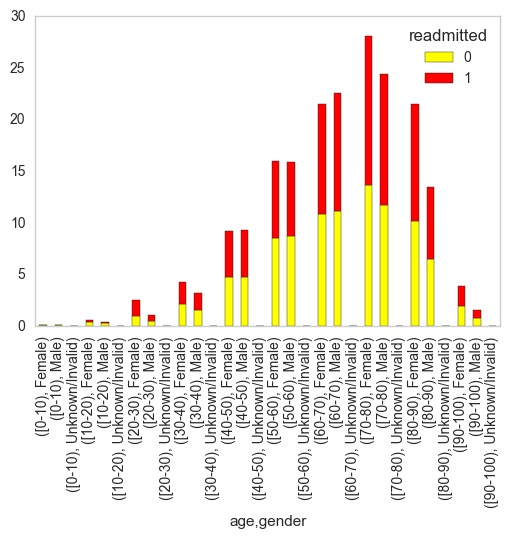

In [27]:
#age and readmittance
age_percents = pd.crosstab([diab['age'],diab["gender"]], diab.readmitted).apply(lambda r: r/r.sum()*100, axis=0)
age_percents.plot(kind='bar', stacked=True, color=['yellow','red'], grid=False) 
#we can see that females tend to get into hospital more often then man. Also, the younger the person, the less chance
#to be readmitted into the hospital. Also, the biggest group of the patients in a hospital is in age 70-80

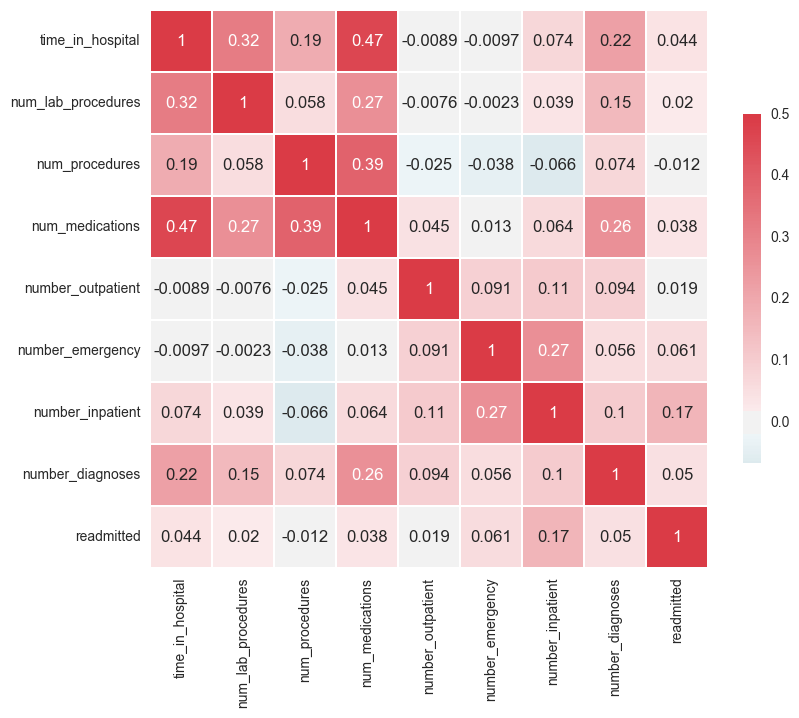

In [28]:
f, ax = plt.subplots(figsize=(9, 9))
#want to see correlation between readmitted and other variables. Correlation is weak with the strongest correlation of
#0.17 for number_inpatient
sns.heatmap(diab.corr(), cmap=cmap, annot=True, vmax=.5, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

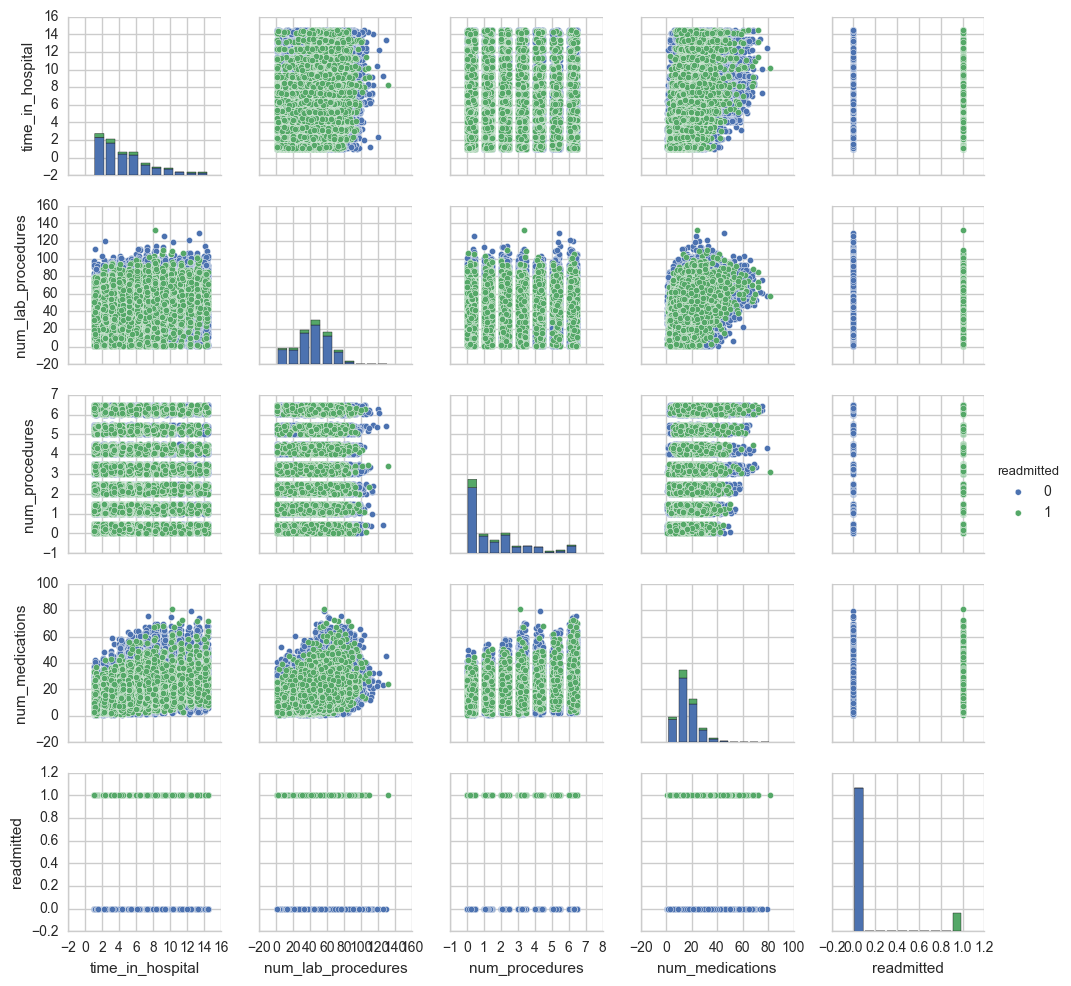

In [29]:
diab_jitter = diab[['time_in_hospital','num_lab_procedures','num_procedures','num_medications',"readmitted"]].copy()
diab_jitter[['time_in_hospital','num_lab_procedures','num_procedures','num_medications']] = diab_jitter[[
        'time_in_hospital','num_lab_procedures','num_procedures','num_medications']].values + np.random.rand(len(diab_jitter),4)/2 
sns.pairplot(diab_jitter, hue="readmitted", size=2)

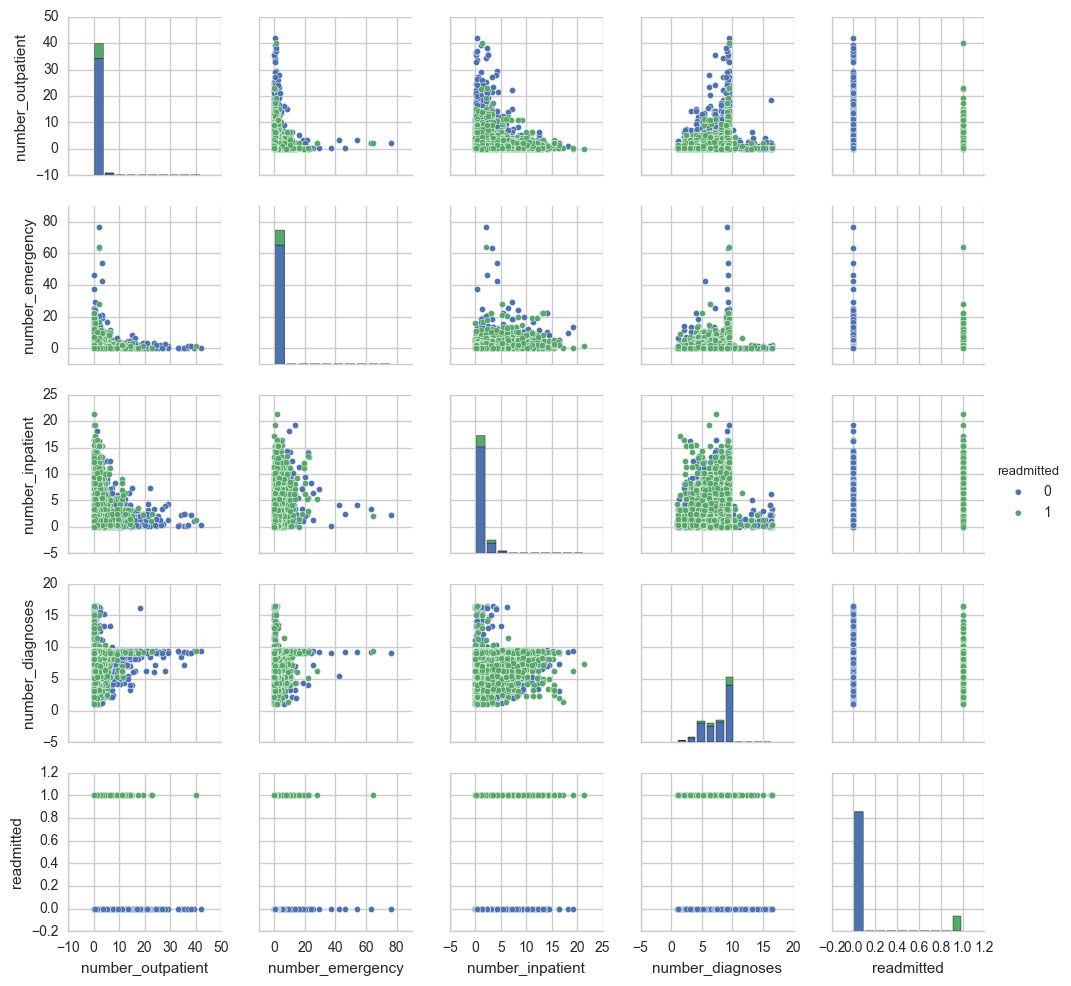

In [30]:
diab_jitter = diab[['number_outpatient','number_emergency','number_inpatient','number_diagnoses',"readmitted"]].copy()
diab_jitter[['number_outpatient','number_emergency','number_inpatient','number_diagnoses']] = diab_jitter[[
        'number_outpatient','number_emergency','number_inpatient','number_diagnoses']].values + np.random.rand(len(diab_jitter),4)/2 
sns.pairplot(diab_jitter, hue="readmitted", size=2)